Ahora que sabes crear tus propios gráficos de líneas, ¡es momento de aprender sobre más tipos de gráficos!

En estasección, aprenderás sobre **gráficos de barras** y **mapas de calor**.

# Configurar el notebook

Como siempre, comenzamos configurando el entorno de programación.  

In [1]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Seleccionar un conjunto de datos

En esta sección, trabajaremos con un conjunto de datos del Departamento de Transporte de Estados Unidos que rastrea los retrasos en vuelos.

Abrir este archivo CSV en Excel muestra una fila para cada mes (donde `1` = enero, `2` = febrero, etc.) y una columna para cada código de aerolínea.

![tut2_flight_delay_head](https://storage.googleapis.com/kaggle-media/learn/images/5nYs9se.png)

Cada entrada muestra el retraso promedio de llegada (en minutos) para una aerolínea y mes diferentes (todo correspondiente al año 2015). Las entradas negativas indican vuelos que (_en promedio_) tendieron a llegar temprano. Por ejemplo, el vuelo promedio de American Airlines (_código de aerolínea: **AA**_) en enero llegó aproximadamente 7 minutos tarde, y el vuelo promedio de Alaska Airlines (_código de aerolínea: **AS**_) en abril llegó aproximadamente 3 minutos temprano.

# Cargar los datos

Como antes, cargamos el conjunto de datos usando el comando `pd.read_csv`.

In [4]:
# Path of the file to read
flight_filepath = "/content/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

Es posible que notes que el código es un poco más corto que el que usamos en el tutorial anterior. En este caso, dado que las etiquetas de fila (de la columna `'Month'`) no corresponden a fechas, no añadimos `parse_dates=True` dentro de los paréntesis. Pero mantenemos las dos primeras piezas de texto como antes, para indicar:  
- la ruta del archivo del conjunto de datos (en este caso, `flight_filepath`), y  
- el nombre de la columna que se usará para indexar las filas (en este caso, `index_col="Month"`).

# Examinar los datos

Como el conjunto de datos es pequeño, podemos imprimir fácilmente todo su contenido. Esto se hace escribiendo una sola línea de código con solo el nombre del dataset.


In [5]:
# Print the data
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


# Gráfico de barras

Supongamos que queremos crear un gráfico de barras que muestre el retraso promedio de llegada para los vuelos de Spirit Airlines (_código de aerolínea: **NK**_), por mes.


Text(0, 0.5, 'Arrival delay (in minutes)')

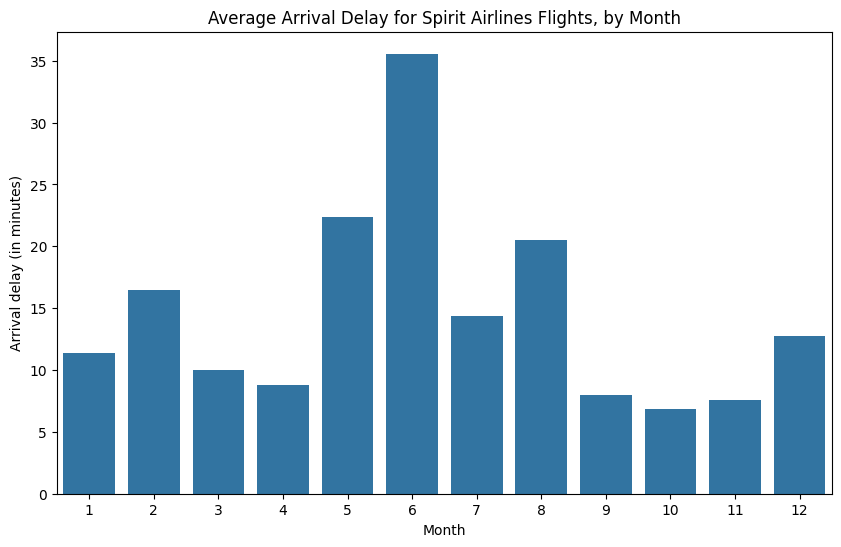

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Los comandos para personalizar el texto (título y etiqueta del eje vertical) y el tamaño de la figura te resultarán familiares de la sección anterior. El código que crea el gráfico de barras es nuevo:

```python
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])
```

Tiene tres componentes principales:  
- `sns.barplot` — Esto indica al notebook que queremos crear un gráfico de barras.  
  - _Recuerda que `sns` se refiere al paquete [seaborn](https://seaborn.pydata.org/), y todos los comandos que usarás para crear gráficos en este curso comenzarán con este prefijo._  
- `x=flight_data.index` — Esto determina qué se usa en el eje horizontal. En este caso, hemos seleccionado la columna que **_indexa_** las filas (en este caso, la columna que contiene los meses).  
- `y=flight_data['NK']` — Esto indica la columna de datos que se usará para determinar la altura de cada barra. En este caso, seleccionamos la columna `'NK'`.

> **Nota importante**: Debes seleccionar la columna que indexa con `flight_data.index`, y no es posible usar `flight_data['Month']` (_lo cual generará un error_). Esto se debe a que cuando cargamos el conjunto de datos, la columna `"Month"` se utilizó para indexar las filas. **Siempre debemos usar esta notación especial para seleccionar la columna índice.**

# Mapa de calor

Nos queda un tipo de gráfico más por aprender: ¡los **mapas de calor**!

En la celda de código a continuación, creamos un mapa de calor para visualizar rápidamente patrones en `flight_data`. Cada celda está codificada por colores según su valor correspondiente.


Text(0.5, 47.7222222222222, 'Airline')

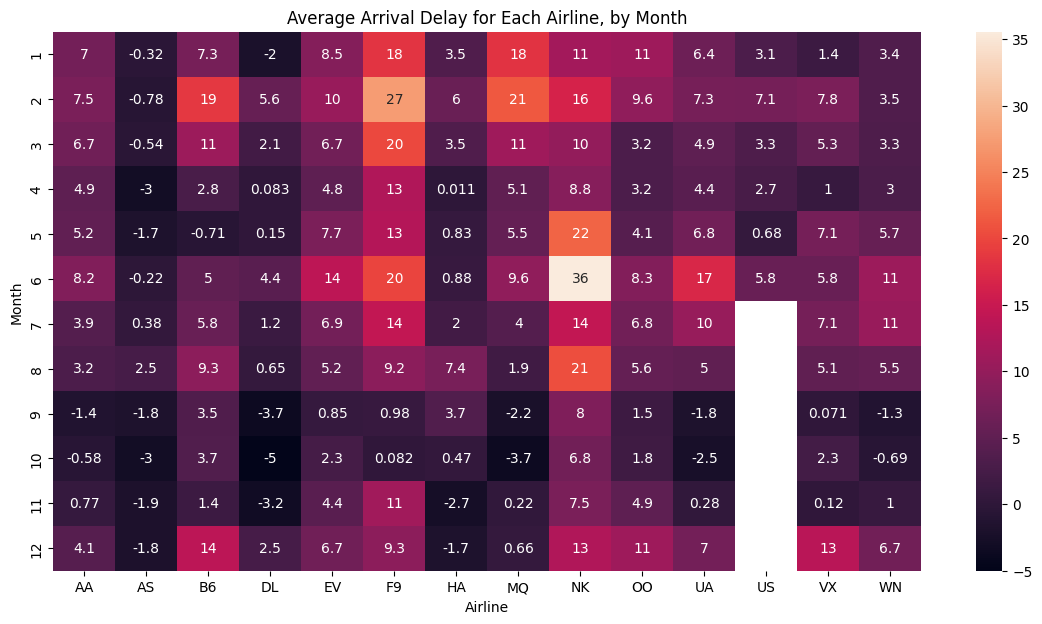

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

El código relevante para crear el mapa de calor es el siguiente:

```python
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)
```

Este código tiene tres componentes principales:  
- `sns.heatmap` — Esto indica al notebook que queremos crear un mapa de calor.  
- `data=flight_data` — Esto indica al notebook que use todas las entradas de `flight_data` para crear el mapa de calor.  
- `annot=True` — Esto asegura que los valores de cada celda aparezcan en el gráfico. (_Si se omite, los números desaparecen de cada celda._)  

_¿Qué patrones puedes detectar en la tabla? Por ejemplo, si observas con atención, los meses hacia el final del año (especialmente los meses 9 a 11) aparecen relativamente oscuros para todas las aerolíneas. ¡Esto sugiere que, en promedio, las aerolíneas son mejores manteniendo el horario durante estos meses!_
